### 생선 분류
- 데이터셋 : fish.csv
- 피쳐/특성 : Weight, Length
- 타겟/라벨 : Species
- 학습방법 : 지도학습 => 분류
- 학습알고리즘 : 최근접이웃알고리즘

[1] 데이터 준비


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
DATA_FILE = '../Data/fish.csv'

In [3]:
# 행 : Bream, Smelt 컬럼 : Species, Weight, Length => 0, 1, 2
fishDF = pd.read_csv(DATA_FILE, usecols=[0,1,2])
fishDF.head(3)

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5


In [5]:
mask = (fishDF['Species'] == 'Bream') | (fishDF['Species'] == 'Smelt')

In [7]:
twoDF = fishDF[mask]
twoDF.head()

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0


In [8]:
twoDF.reset_index(drop=True, inplace=True)

In [9]:
twoDF.index

RangeIndex(start=0, stop=49, step=1)

In [12]:
# Species 컬럼을 수치화 => Bream: 0, Smelt: 1
twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})

C:\Users\KDP-50\AppData\Local\Temp\ipykernel_14960\4063027218.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  twoDF['fishcode'] = twoDF.Species.replace({'Bream': 0, 'Smelt': 1})


In [14]:
twoDF.head(10)

,Species,Weight,Length,fishcode
0,Bream,242.0,25.4,0
1,Bream,290.0,26.3,0
2,Bream,340.0,26.5,0
3,Bream,363.0,29.0,0
4,Bream,430.0,29.0,0
5,Bream,450.0,29.7,0
6,Bream,500.0,29.7,0
7,Bream,390.0,30.0,0
8,Bream,450.0,30.0,0
9,Bream,500.0,30.7,0


[2] 피처와 타겟 분리

In [16]:
features = twoDF[['Weight', 'Length']]
target = twoDF['fishcode']

print(f'feature => {features.shape}, {features.ndim}D')
print(f'target => {target.shape}, {target.ndim}D')

feature => (49, 2), 2D
target => (49,), 1D


[3] 데이터셋 준비 => 학습용, 테스트용

In [15]:
from sklearn.model_selection import train_test_split

In [20]:
# train:test = 80:20 ==> test_size=0.2 또는 train_size=0.8
# stratify 매개변수 : *분류*일 경우 사용, 분류 타겟의 종류에 대한 비율을 고려
X_train, X_test, Y_train, Y_test = train_test_split(features,
                                                    target,
                                                    test_size=0.2,
                                                    stratify=target,
                                                    random_state=10)

In [22]:
print(f'X_train: {X_train.shape}, {X_train.ndim}D')
print(f'Y_train: {Y_train.shape}, {Y_train.ndim}D')

print(f'X_test: {X_test.shape}, {X_test.ndim}D')
print(f'Y_test: {Y_test.shape}, {Y_test.ndim}D')

X_train: (39, 2), 2D
Y_train: (39,), 1D
X_test: (10, 2), 2D
Y_test: (10,), 1D


In [25]:
Y_train.head()

7     0
43    1
1     0
46    1
31    0
Name: fishcode, dtype: int64

In [27]:
# target 0(Bream), 1(Smelt)의 비율
Y_train.value_counts()

fishcode
0    28
1    11
Name: count, dtype: int64

In [31]:
Y_train.shape

(39,)

In [32]:
Y_train.value_counts()[0]/Y_train.shape[0], Y_train.value_counts()[1]/Y_train.shape[0]

(0.717948717948718, 0.28205128205128205)

In [33]:
Y_test.value_counts()[0]/Y_test.shape[0], Y_test.value_counts()[1]/Y_test.shape[0]

(0.7, 0.3)

[4] 훈련/학습 진행
- 학습 알고리즘 인스턴스 생성
- 학습진행 => fit()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
# 인스턴스 생성
model = KNeighborsClassifier()

In [36]:
# 학습 진행 ==> 학습용 데이터셋
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [38]:
# 학습 후 모델 파라미터
model.classes_, model.feature_names_in_, model.n_samples_fit_

(array([0, 1], dtype=int64), array(['Weight', 'Length'], dtype=object), 39)

[5] 모델 성능평가 ==> score() 메서드 + 테스트 데이터셋

In [39]:
model.score(X_test, Y_test)

1.0

[6] 예측하기 ==> 학습/훈련과 테스트에 사용되지 않은 데이터 사용
- 주의사항 : 입력데이터 ==> 2D

In [69]:
new_data = pd.DataFrame([[413, 27.1]], columns=model.feature_names_in_)
new_data

,Weight,Length
0,413,27.1


In [43]:
model.predict(new_data)

array([0], dtype=int64)

In [44]:
### 최근접한 k개 데이터 찾기
distance, index = model.kneighbors(new_data)

In [45]:
distance

array([[17.10584695, 23.18210517, 37.09123886, 37.11347464, 50.03608698]])

In [48]:
index.reshape(-1).tolist()

[25, 0, 21, 6, 22]

In [49]:
neighbors = index.reshape(-1).tolist()

In [53]:
twoDF.loc[neighbors]

,Species,Weight,Length,fishcode
25,Bream,725.0,35.0,0
0,Bream,242.0,25.4,0
21,Bream,685.0,34.0,0
6,Bream,500.0,29.7,0
22,Bream,620.0,34.5,0


In [59]:
new_data['Weight'], new_data['Length']

(0    413
 Name: Weight, dtype: int64,
 0    27.1
 Name: Length, dtype: float64)

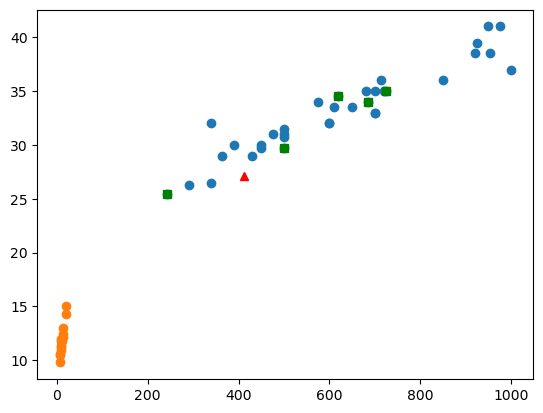

In [68]:
### 시각화로 확인

plt.scatter(twoDF.loc[:34, 'Weight'], twoDF.loc[:34, 'Length'])
plt.scatter(twoDF.loc[35:, 'Weight'], twoDF.loc[35:, 'Length'])
plt.plot(new_data['Weight'], new_data['Length'], 'r^')
plt.plot(twoDF.loc[neighbors]['Weight'], twoDF.loc[neighbors]['Length'], 'gs')
plt.show()